<a href="https://colab.research.google.com/github/bpcju/assingnment5/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.2789 - loss: 2.1513 - val_accuracy: 0.4759 - val_loss: 1.4607 - learning_rate: 0.0010
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4699 - loss: 1.4866 - val_accuracy: 0.5983 - val_loss: 1.1211 - learning_rate: 0.0010
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5448 - loss: 1.2762 - val_accuracy: 0.6090 - val_loss: 1.1103 - learning_rate: 0.0010
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5964 - loss: 1.1476 - val_accuracy: 0.5766 - val_loss: 1.2435 - learning_rate: 0.0010
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6244 - loss: 1.0773 - val_accuracy: 0.6875 - val_loss: 0.9040 - learning_rate: 0.0010
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6600 - loss: 0.9821 - val_accuracy: 0.7178 - val_loss: 0.8134 - learning_rate: 9.0484e-04
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - ac

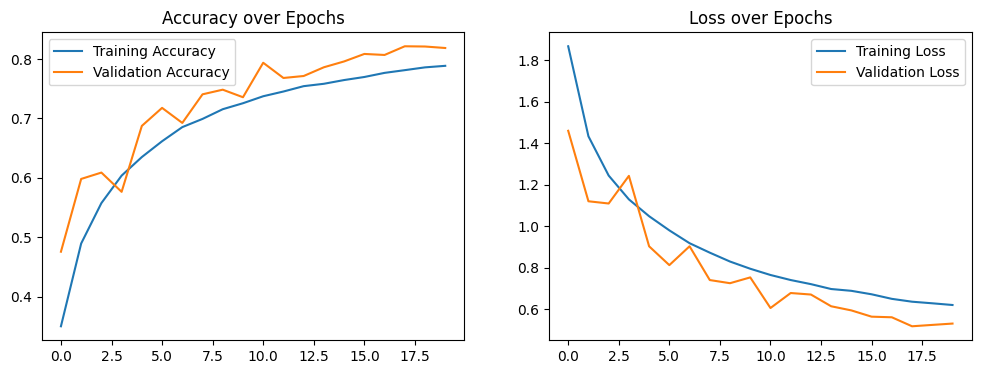

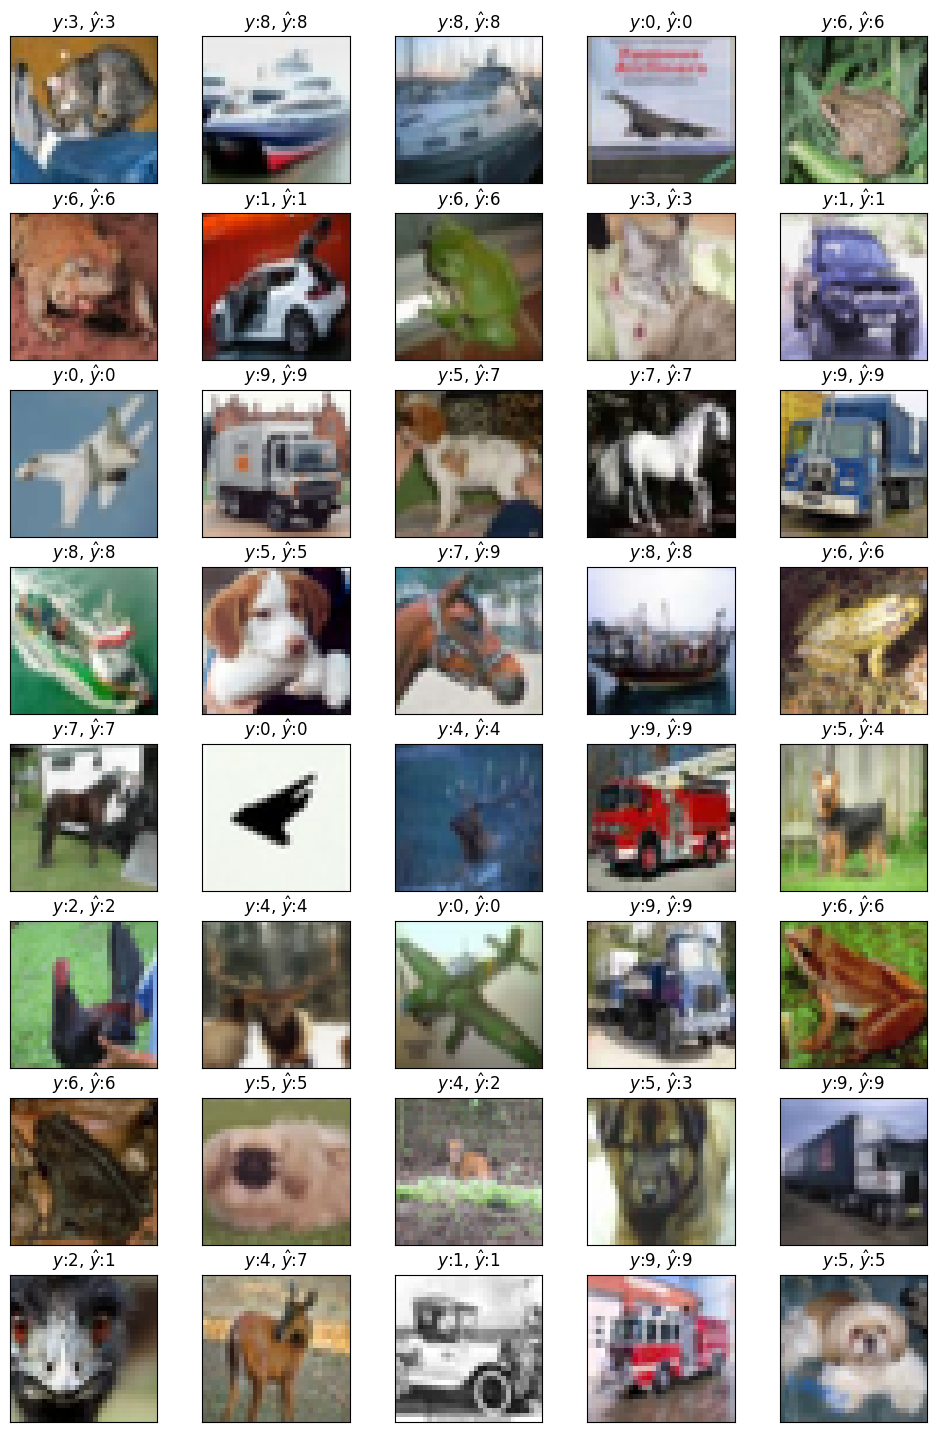

In [2]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


data_augmentation = tf.keras.Sequential([

    tf.keras.layers.RandomFlip("horizontal"),

    tf.keras.layers.RandomZoom(0.1),

    tf.keras.layers.RandomRotation(0.1),
])


model = tf.keras.models.Sequential([

    tf.keras.Input(shape=(32, 32, 3)),
    data_augmentation,


    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),


    tf.keras.layers.Conv2D(128, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),


    tf.keras.layers.Conv2D(256, (3, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation="softmax")
])


def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:

        return float(lr * tf.math.exp(-0.1))

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


history = model.fit(
    x_train, y_train,
    epochs=20,
    callbacks=[lr_scheduler],
    validation_data=(x_test, y_test)


print("\n--- Model Evaluation ---")
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])

    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i]).numpy()}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()